# NLP Challenge: Twitter Sentiment Analysis

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from nltk.tokenize import word_tokenize
import re

In [18]:
# Import the machine learning model of your choice
from sklearn.linear_model import LogisticRegression

# Step 1: Load the Sentiment140 dataset

In [19]:
# Download the dataset from Kaggle and specify the file path
df = pd.read_csv("../0_data/training.1600000.processed.noemoticon.csv", encoding='latin1')

In [20]:
df.columns = ["target", "ids", "date", "flag", "user", "text"]
df.tail()

,target,ids,date,flag,user,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


# Step 2: Data Preprocessing

In [21]:
# Clean the text data, remove special characters, handle missing values, etc.
def process_text(line):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub("", line)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words]
    return ' '.join(output)

df["text"] = df["text"].apply(process_text)

# Step 3: Feature Extraction

In [23]:
df.shape

(1599999, 6)

In [24]:
df.dropna(inplace=True)
df.shape

(1599999, 6)

In [27]:
# Choose a feature extraction method (e.g., TF-IDF, Gensim, or a pretrained language model) and transform the text data into numerical features.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df["text"])
y = df["target"]

# Step 4: Model Selection and Training

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning model (e.g., Logistic Regression) and train it
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Step 5: Sentiment Analysis

In [29]:
# Perform sentiment analysis on the dataset using your trained model
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7661083634500369

# Step 6: Visualizations

In [45]:
# Select an AI company or product of your choice and collect tweets related to it
from wordcloud import WordCloud

mormon_df = df.loc[df["text"].str.contains('ally')]
mo_X = tfidf_vectorizer.fit_transform(mormon_df["text"])
mo_y = mormon_df["target"]

# Use your trained model to predict sentiment on these tweets
y_mo_pred = model.predict(mo_X)
print(balanced_accuracy_score(mo_y, y_mo_pred))


0.5584612157597976


In [46]:
mormon_df.head()

,target,ids,date,flag,user,text
13,0,1467812784,Mon Apr 06 22:20:20 PDT 2009,NO_QUERY,bayofwolves,smarrison i wouldve been the first but i didnt...
39,0,1467818020,Mon Apr 06 22:21:39 PDT 2009,NO_QUERY,itsanimesh,really dont feel like getting up today but got...
42,0,1467818900,Mon Apr 06 22:21:53 PDT 2009,NO_QUERY,DdubsShellBell,jonathanrknight awww i soo wish i was there to...
69,0,1467825411,Mon Apr 06 22:23:35 PDT 2009,NO_QUERY,michrod,jdarter oh haha dude i dont really look at em ...
71,0,1467825863,Mon Apr 06 22:23:43 PDT 2009,NO_QUERY,BrookeAmanda,i really hate how people diss my bands trace i...


In [76]:

# Create visualizations to showcase sentiment (e.g., bar charts, word clouds)
from nltk.corpus import stopwords
from collections import Counter

big_string = ' '.join(mormon_df["text"].loc[mormon_df["target"]==4].astype(str))

def new_process(doc):
    sw = set(stopwords.words('english'))
    words = word_tokenize(doc)
    output = [word.lower() for word in words if word.lower() not in sw]
    return ' '.join(output)
no_stops = new_process(big_string)
big_list = no_stops.split()

big_string_neg = ' '.join(mormon_df["text"].loc[mormon_df["target"]==0].astype(str))
no_stops_neg = new_process(big_string_neg)
big_list_neg = no_stops_neg.split()


### Positive sentiment cloud

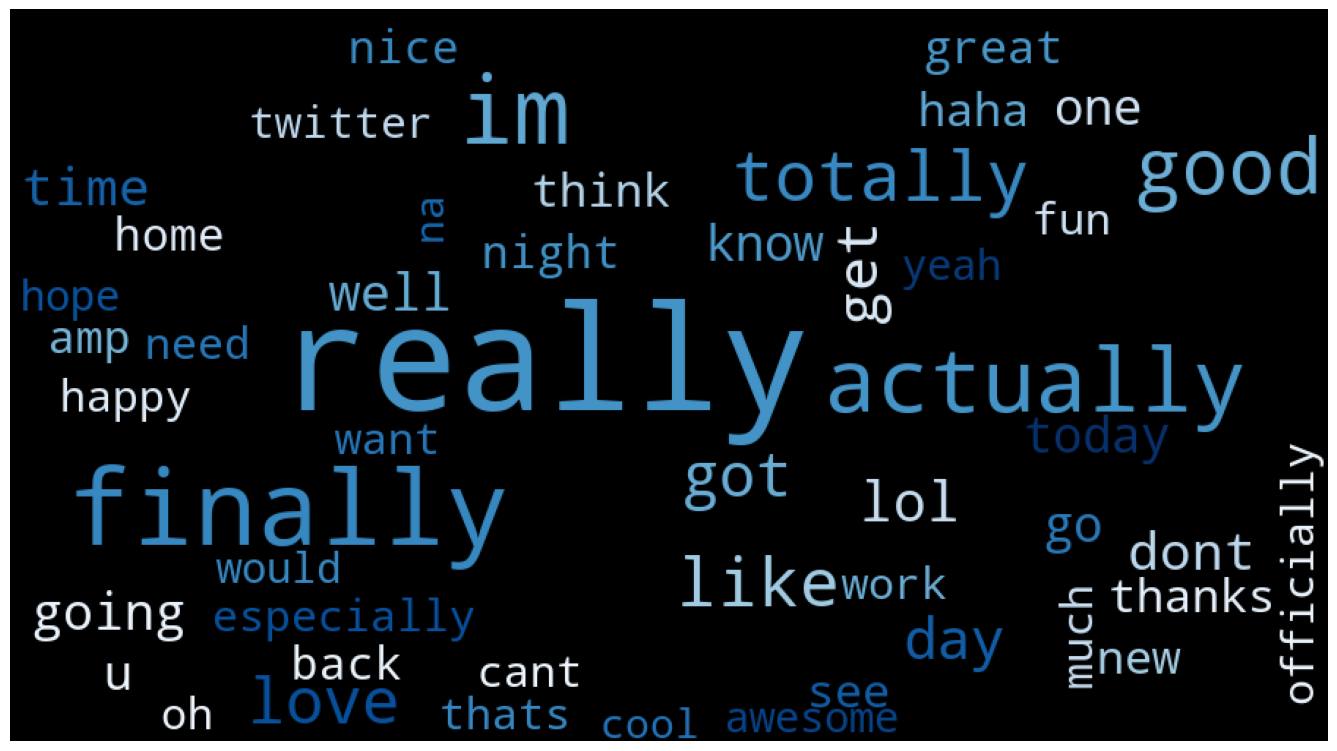

In [77]:

wordfreq = Counter(big_list)

wordcloud = WordCloud(width=900,
                  height=500,
                  max_words=50,
                  max_font_size=100,
                  relative_scaling=0.5,
                  colormap='Blues',
                  normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, cmap="gray_r")
plt.axis("off")
plt.show()


### Negative sentiment cloud

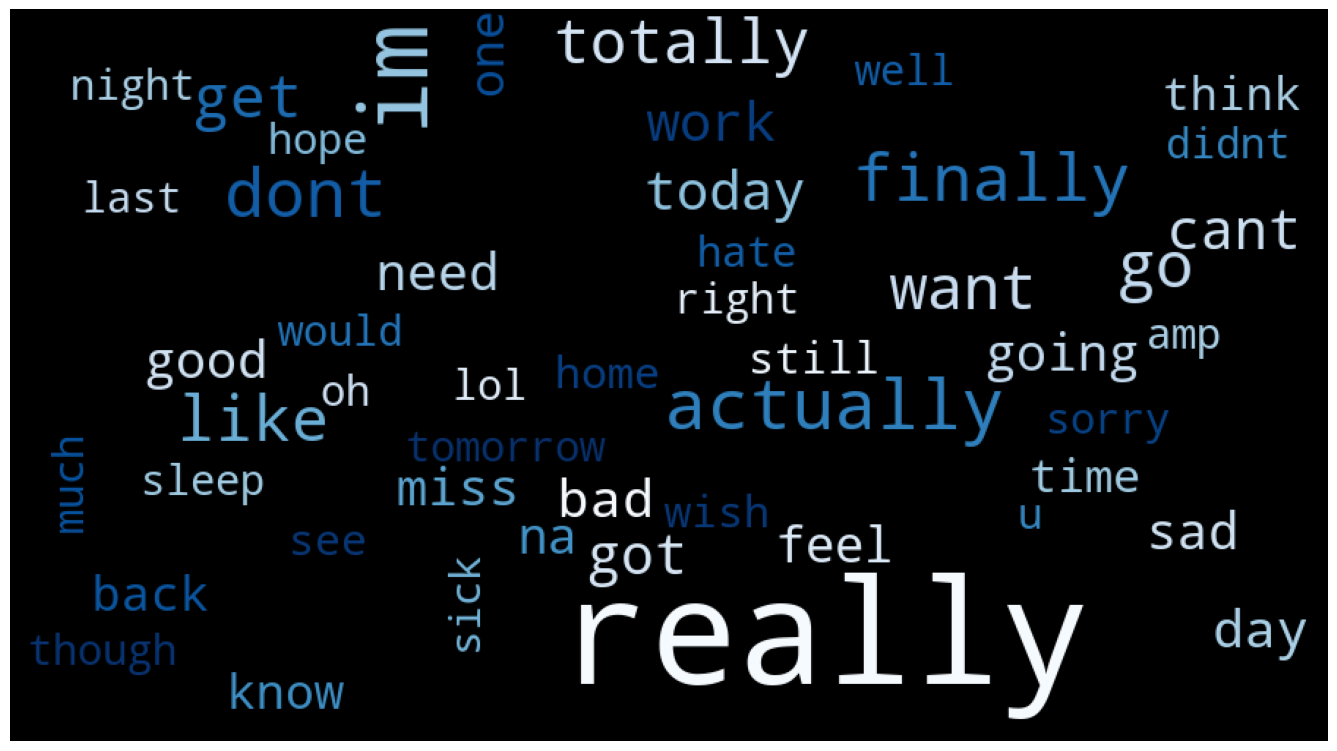

In [78]:
wordfreq_neg = Counter(big_list_neg)

wordcloud_neg = WordCloud(width=900,
                  height=500,
                  max_words=50,
                  max_font_size=100,
                  relative_scaling=0.5,
                  colormap='Blues',
                  normalize_plurals=True).generate_from_frequencies(wordfreq_neg)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud_neg, cmap="gray_r")
plt.axis("off")
plt.show()

<Axes: xlabel='target'>

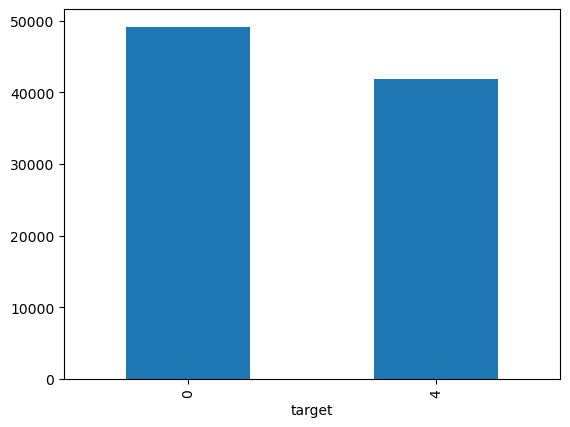

In [84]:
# Example: 
# - Visualize sentiment distribution using seaborn or matplotlib.
# - Create word clouds for positive and negative tweets.
# - Generate a bar chart showing sentiment scores for the chosen company/product.

# Additional Tips:
# - Experiment with hyperparameter tuning to improve model performance.
# - Use cross-validation for a more robust evaluation.
# - Write functions to encapsulate repetitive tasks and improve code organization.

mormon_df["target"].value_counts().plot(kind="bar")

# Evaluation

In [87]:
# Evaluate your model's performance using metrics like accuracy, precision, recall, and F1-score.

# Example:
# - accuracy = accuracy_score(y_test, y_pred)
# - classification_report(y_test, y_pred)
# - confusion_matrix(y_test, y_pred)

# Display your results and visualizations.
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(mo_y, y_mo_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(mo_y, y_mo_pred))


                   pre       rec       spe        f1       geo       iba       sup

          0       0.60      0.50      0.61      0.55      0.56      0.31     49166
          4       0.51      0.61      0.50      0.56      0.56      0.31     41896

avg / total       0.56      0.55      0.56      0.55      0.56      0.31     91062

[[24809 24357]
 [16242 25654]]


---